In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Lets do some EDA to see what is the general contents of the data to see what we can manipulate and visualize.

In [2]:
# This first datasets appears to be the same as the updated one just with an added column of the preferred payment method.
shop_trend_df = pd.read_csv('shopping_trends.csv') 
shop_behavior_df = pd.read_csv('shopping_behavior_updated.csv')

display(shop_behavior_df.info())
display(shop_behavior_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

None

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Looking at this data currently it appears to be good to go with no missing data. I am curious if this data holds multiple records from one customer however.

In [3]:
#Lets see if customer 1 appears frequently in the database
display(shop_behavior_df[shop_behavior_df["Customer ID"] == 1])
display(shop_behavior_df[shop_behavior_df["Customer ID"] == 2])
display(shop_behavior_df[shop_behavior_df["Customer ID"] == 20])

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
19,20,66,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly


This is a bit odd that the data is not available as it does show that a customer has had previous purchases, but the customer is not shown repeatedly in the dataset. As this data does not have a date available I can only assume that this data snapshot focuses on a single day for the entire business if there are no customer duplicates. Ideally, I would ask the person who was handling the source data directly to confirm this. Now that we have established that we are unlikely to encounter multiple rows from the same customer. I want to start visualizing this data so we have a general idea of what is the most popular item that is being purchased from this business.

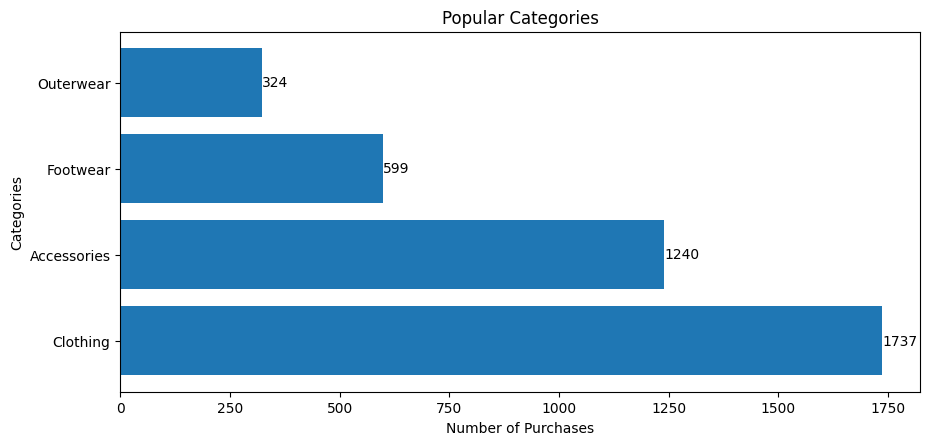

In [4]:
categories = shop_behavior_df['Category']
purchases = categories.value_counts()
plt.axes((0.5,0.5,1.25,0.75))
plt.xlabel("Number of Purchases")
plt.ylabel("Categories")
plt.title("Popular Categories")
pop_categories = plt.barh(purchases.index,purchases.values)
plt.bar_label(pop_categories)

plt.show()

Looking at this graph we can see that the most popular category of items purchased from this store being Clothing followed by Accessories. The least purchased category from this store is outerwear. Lets narrow the demographics some more to the customer's gender.

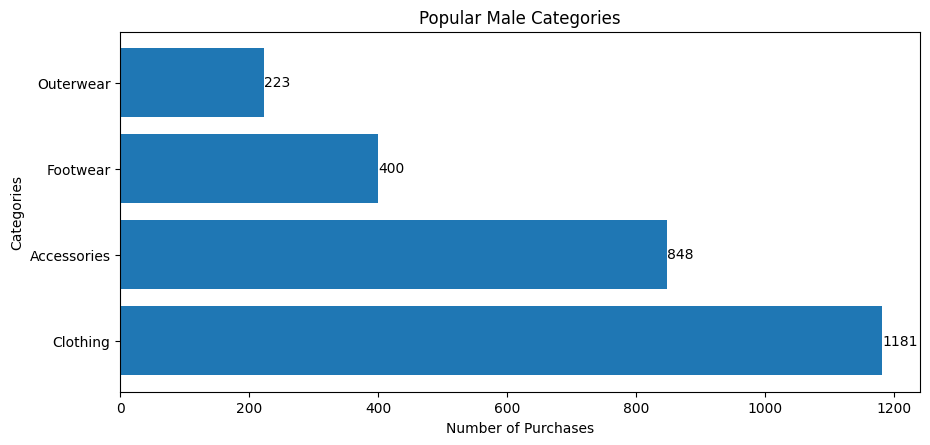

In [6]:
male_customers = shop_behavior_df[shop_behavior_df['Gender'] == 'Male']
male_categories = male_customers['Category']
purchases = male_categories.value_counts()
plt.axes((0.5,0.5,1.25,0.75))
plt.xlabel("Number of Purchases")
plt.ylabel("Categories")
plt.title("Popular Male Categories")
pop_categories = plt.barh(purchases.index,purchases.values)
plt.bar_label(pop_categories)

plt.show()

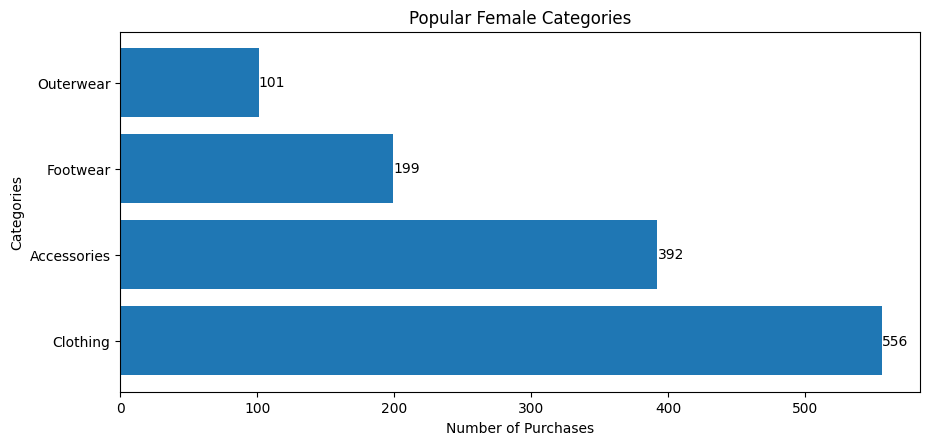

In [8]:
female_customers = shop_behavior_df[shop_behavior_df['Gender'] == 'Female']
female_categories = female_customers['Category']
purchases = female_categories.value_counts()
plt.axes((0.5,0.5,1.25,0.75))
plt.xlabel("Number of Purchases")
plt.ylabel("Categories")
plt.title("Popular Female Categories")
pop_categories = plt.barh(purchases.index,purchases.values)
plt.bar_label(pop_categories)

plt.show()